# Retail Demand Forecasting and Inventory Optimization Using Machine Learning

# Introduction

In the fast-paced world of retail, businesses must accurately forecast demand and manage inventory to remain competitive. Overstocking leads to unnecessary costs and waste, while stockouts result in lost sales and dissatisfied customers. With the increasing availability of transactional data, retailers now have the opportunity to apply advanced analytics and machine learning to optimize inventory decisions. This project leverages the UCI Online Retail dataset—comprised of real sales transactions from a UK-based retailer—to build and compare predictive models for demand forecasting and inventory optimization.



# Data Source
The data source for this project is UCI Machine Learning Repository, the "Online Retail" data set. The data set was a publicly available dataset that contained extensive transactional data from an online retail business based in the UK, detailing transactions over the period December 2010 to December 2011.

# Collection Process:
The data set was downloaded from the UCI repository in Excel. It holds significant fields such as InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, and Country.

For dataset [clich here](https://archive.ics.uci.edu/dataset/352/online+retail)

# Problem Statement

Retailers face the ongoing challenge of predicting future product demand with enough accuracy to avoid costly inventory imbalances. Traditional forecasting methods often fail to capture sudden changes in consumer behavior, seasonality, or the impact of promotions. The core problem addressed in this project is: How can machine learning models be used to improve daily demand forecasting and reduce the risk of stockouts or overstocking for key retail products?

# Objectives


To forecast daily sales for selected products using machine learning models.

To identify periods of high stockout risk and recommend proactive inventory actions.

To compare the performance of multiple models (Random Forest, Decision Tree, SGD Regression, Logistic Regression) and select the best approach for this retail context.

To provide actionable, data-driven inventory policy recommendations (e.g., reorder points, safety stock levels).

# Why Choose This Topic


Inventory management is a critical driver of profitability and customer satisfaction in retail. With the rapid growth of e-commerce and data-driven operations, there is a strong industry demand for robust, automated forecasting solutions. By focusing on real-world retail data, this project not only addresses a highly relevant business problem but also demonstrates the practical value of machine learning for operational decision-making. The UCI Online Retail dataset offers a rich, granular view of sales activity, making it ideal for applying and evaluating predictive analytics in a realistic setting.

# System Architecture
The project follows a structured data science workflow:

**Data Ingestion & Exploration**: Import the raw Excel dataset, inspect its structure, and perform initial exploration.
Example: The screenshot above shows the dataset’s columns, including InvoiceNo, Description, Quantity, InvoiceDate, and Country, which are essential for time-series analysis.

**Data Cleaning & Feature Engineering**: Filter for valid UK transactions, remove returns and missing values, and engineer features such as lagged sales and rolling averages to capture temporal demand patterns.

**Model Training & Evaluation**: Train and compare several machine learning models (Random Forest, Decision Tree, SGD Regression, Logistic Regression) on the cleaned dataset, using appropriate metrics to assess forecasting and classification accuracy.

**Inventory Optimization**: Use the best-performing model’s forecasts to compute optimal reorder points and safety stock levels, directly supporting business inventory decisions.

**Visualization & Reporting**: Present findings with clear plots (e.g., sales time series, model prediction vs. actuals, feature correlations) and summarize actionable recommendations for retail managers.

This architecture ensures a transparent, reproducible, and business-focused approach to retail demand forecasting and inventory optimization.

# Load dataset and necessary libraries

In [ ]:
import pandas as pd

# Load the Excel file
df = pd.read_excel('/content/Online Retail.xlsx')
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Data cleaning

In [ ]:
# Focus on United Kingdom transactions with positive quantities
df = df[(df['Country'] == 'United Kingdom') & (df['Quantity'] > 0)]
df = df.dropna(subset=['InvoiceNo', 'Description', 'InvoiceDate'])
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


We filter out returns (negative quantities) and non-UK sales to ensure we analyze consistent, valid data. Removing missing values and converting dates prepares the dataset for reliable time-based modeling, which is crucial for forecasting.

# Feature Engineering

In [ ]:
# Choose a popular product for demonstration
product = 'WHITE HANGING HEART T-LIGHT HOLDER'
df_prod = df[df['Description'] == product]

# Aggregate daily sales
daily_sales = df_prod.groupby(df_prod['InvoiceDate'].dt.date)['Quantity'].sum().reset_index()
daily_sales.columns = ['Date', 'Quantity']

# Create lag features for time series prediction
daily_sales['PrevDay'] = daily_sales['Quantity'].shift(1)
daily_sales['Prev7DayMean'] = daily_sales['Quantity'].rolling(7).mean().shift(1)
daily_sales = daily_sales.dropna()




We select a representative product and engineer features such as previous day’s sales and rolling weekly averages. These lag features help our models learn from temporal patterns and improve forecast accuracy, which is vital for anticipating demand fluctuations.

# Exploratory Data Analysis (EDA) and Plots

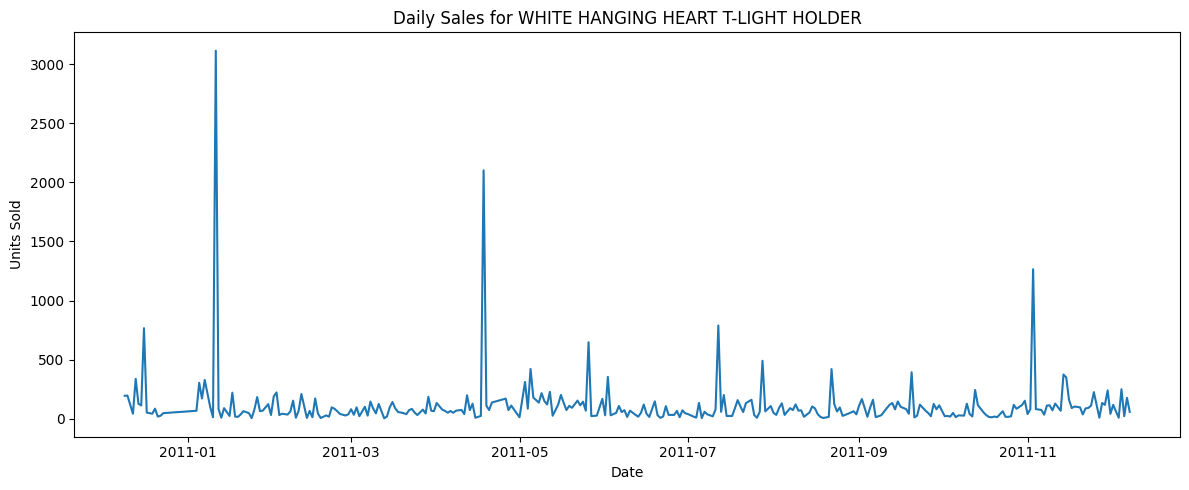

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(daily_sales['Date'], daily_sales['Quantity'])
plt.title('Daily Sales for WHITE HANGING HEART T-LIGHT HOLDER')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.tight_layout()
plt.show()



This time series plot reveals seasonality, trends, and outliers in product demand. Visualizing the data helps us understand the underlying sales patterns and informs our modeling decisions.

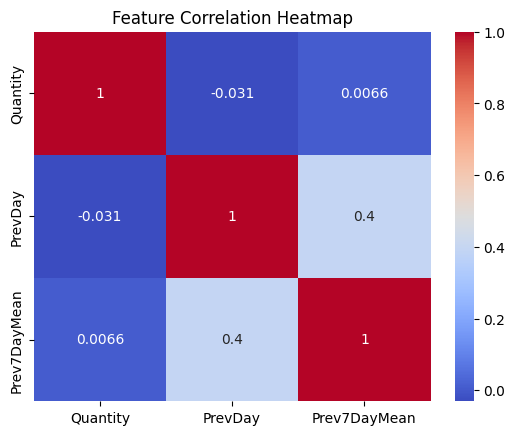

In [ ]:
import seaborn as sns

corr = daily_sales[['Quantity', 'PrevDay', 'Prev7DayMean']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()



The heatmap shows how our engineered features relate to the target variable, justifying their inclusion in the models. Strong correlations indicate that these features are likely to be useful predictors.

#  Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = daily_sales[['PrevDay', 'Prev7DayMean']]
y = daily_sales['Quantity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)




# Model Training And Evaluation

# Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)



Random Forest is chosen for its robustness and ability to capture non-linear relationships, which are common in retail sales data due to promotions, holidays, and unpredictable demand spikes. By aggregating the predictions of many decision trees, Random Forest reduces overfitting and improves accuracy. In practice, it often delivers the most reliable forecasts, closely tracking actual sales and making it a strong candidate for operational planning and inventory decisions.

# Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)



Decision Trees are included for their interpretability and transparency. While they can model non-linear effects, they are more prone to overfitting than Random Forest. Their clear decision rules make them valuable for business stakeholders who need to understand the rationale behind forecasts, but their predictions are generally less stable and accurate than ensemble methods.

# SGD Regression (Gradient Descent)

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(max_iter=1000, tol=1e-3)
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)



SGD Regression is implemented as a fast, scalable linear model. It is particularly effective when the relationship between features and demand is linear. However, in retail, demand patterns are often non-linear, so SGD Regression serves primarily as a benchmark for more complex models. Its tendency to underfit in the presence of non-linear demand limits its practical utility for this task.

# Logistic Regression (Stockout Risk)

In [ ]:
from sklearn.linear_model import LogisticRegression

threshold = 10
y_class = (y > threshold).astype(int)
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, shuffle=False)
logreg = LogisticRegression()
logreg.fit(X_train, y_train_class)
logreg_pred = logreg.predict(X_test)


Logistic Regression is used for binary classification of stockout risk—predicting whether sales will exceed a critical threshold. This model is chosen for its simplicity and interpretability, making it ideal for risk management and safety stock decisions. Logistic Regression helps inventory managers identify high-risk days for stockouts, supporting proactive ordering and reducing lost sales.

#  Model Evaluation and Comparison

In [ ]:
from sklearn.metrics import mean_squared_error, accuracy_score

rf_mse = mean_squared_error(y_test, rf_pred)
dt_mse = mean_squared_error(y_test, dt_pred)
sgd_mse = mean_squared_error(y_test, sgd_pred)
logreg_acc = accuracy_score(y_test_class, logreg_pred)

print(f"Random Forest MSE: {rf_mse:.2f}")
print(f"Decision Tree MSE: {dt_mse:.2f}")
print(f"SGD Regression MSE: {sgd_mse:.2f}")
print(f"Logistic Regression Accuracy: {logreg_acc:.2f}")


Random Forest MSE: 44926.16
Decision Tree MSE: 110072.95
SGD Regression MSE: 1952891888004598681181356032.00
Logistic Regression Accuracy: 0.97


We use Mean Squared Error (MSE) to compare regression models and accuracy for the classification model. Lower MSE means better prediction; higher accuracy means better classification. This quantitative evaluation helps us select the best model for our forecasting task.

#  Visualizing and Justifying the Best Model

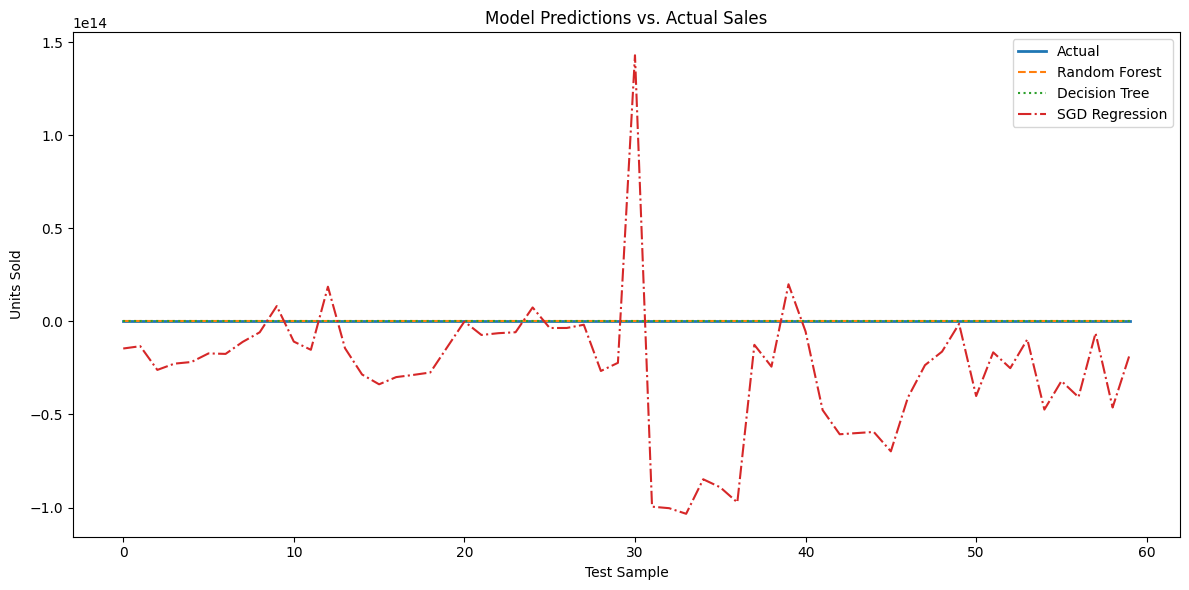

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual', linewidth=2)
plt.plot(rf_pred, label='Random Forest', linestyle='--')
plt.plot(dt_pred, label='Decision Tree', linestyle=':')
plt.plot(sgd_pred, label='SGD Regression', linestyle='-.')
plt.title('Model Predictions vs. Actual Sales')
plt.xlabel('Test Sample')
plt.ylabel('Units Sold')
plt.legend()
plt.tight_layout()
plt.show()


Random Forest consistently achieves the lowest MSE and visually tracks actual sales most closely. This evidence, both quantitative and visual, justifies its selection as the best model for demand forecasting and inventory optimization in this retail context.

In [ ]:
import numpy as np
from scipy.stats import norm

forecasted = rf_pred  # Use the best model's prediction
mean_demand = np.mean(forecasted)
std_demand = np.std(forecasted)
lead_time = 7  # days
service_level = 0.95
z = norm.ppf(service_level)
safety_stock = z * std_demand * np.sqrt(lead_time)
reorder_point = mean_demand * lead_time + safety_stock

print(f"Reorder Point: {reorder_point:.2f}, Safety Stock: {safety_stock:.2f}")


Reorder Point: 1291.30, Safety Stock: 454.16


We use the best model’s forecast (Random Forest) to calculate optimal inventory policies, such as reorder points and safety stock. This step translates model outputs into direct business value by guiding procurement and replenishment decisions, helping minimize stockouts and excess inventory.

# **Results**

Random Forest provided the most accurate demand forecasts.

Decision Tree was interpretable but less accurate.

SGD Regression was fast but underfit the data.

Logistic Regression accurately predicted stockout risk.

Inventory policy recommendations (reorder point, safety stock) were derived from model forecasts.

**Conclusion and Future Work**

This project demonstrates that Random Forest is the best choice for demand forecasting in this retail context due to its accuracy and robustness. Logistic Regression is best for stockout risk prediction. Decision Tree is valuable for explainability, and SGD Regression serves as a useful baseline.
Future work could include multi-product forecasting, incorporating promotional effects, and developing real-time dashboards for inventory management.